In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import tensorflow as tf


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/creditcard_2023.csv")

In [ ]:
file1.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


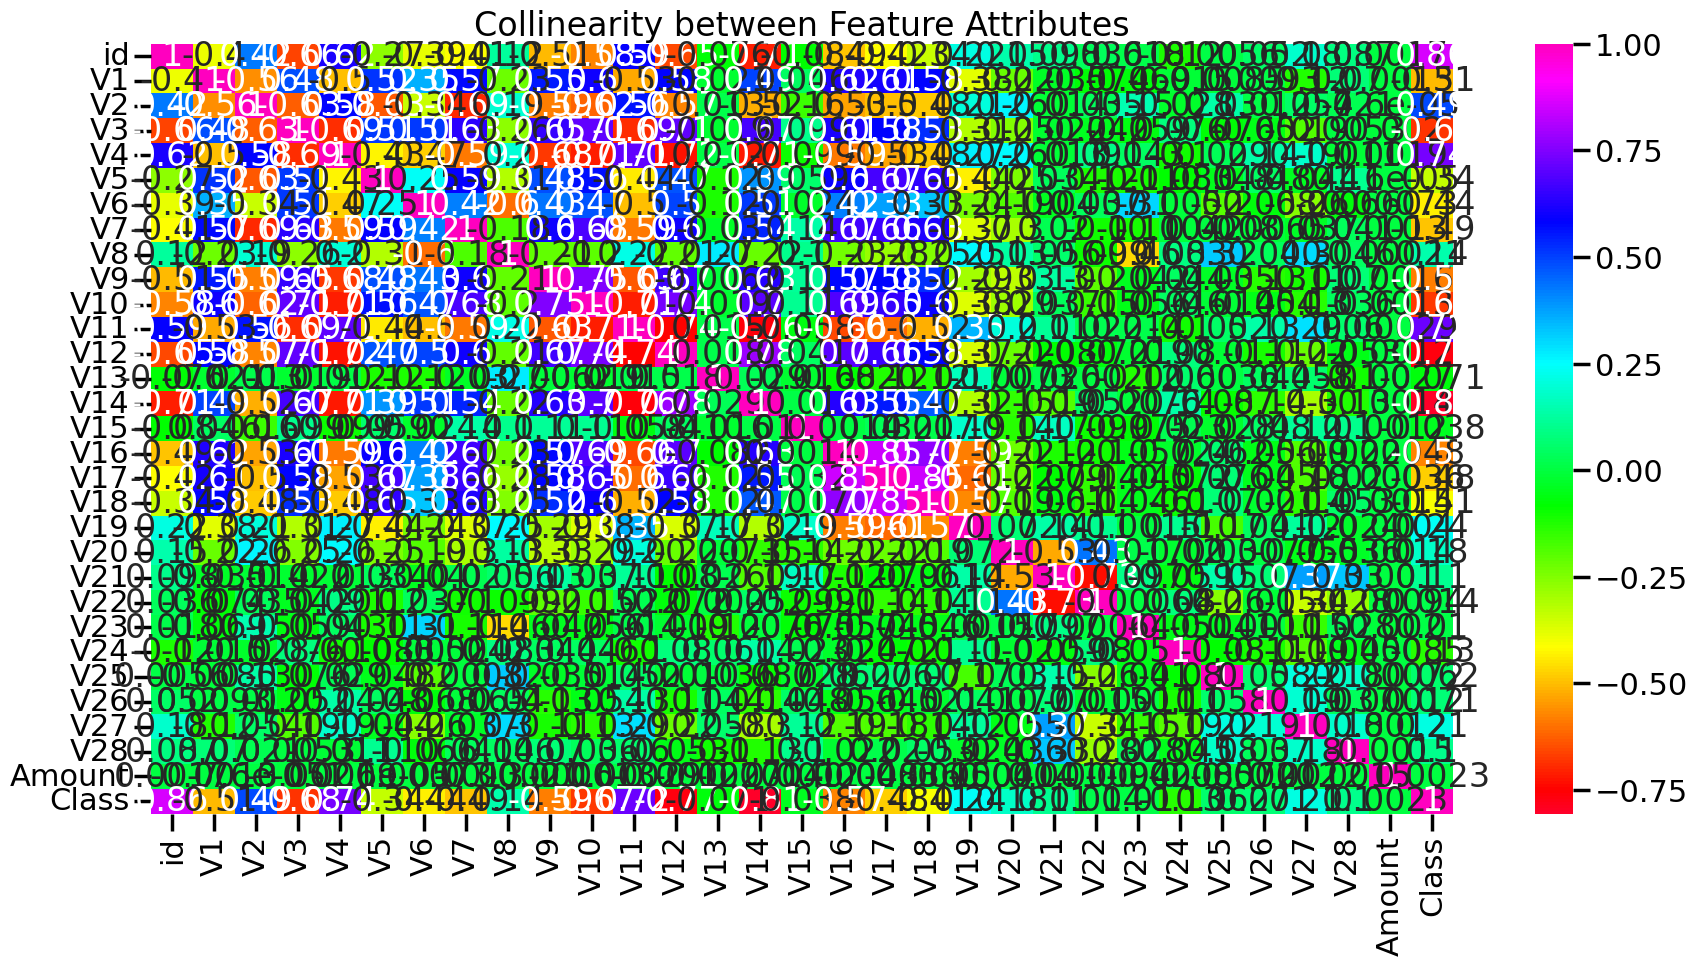

In [ ]:
fig, ax = plt.subplots(figsize=(21,10))
sns.set_context('poster')
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='gist_rainbow', annot = True)
ax.set_title('Collinearity between Feature Attributes') #How collinear feature attributes are
plt.savefig('Map.png')

#plt.pie(arr, labels = labels, explode=[0.3, 0.0], shadow = True)
#plt.show()

In [ ]:

print(df.columns)

df["Amount"].unique()

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


array([17982.1 ,  6531.37,  2513.54, ...,  4394.16,  4653.4 , 21493.92])

In [ ]:
%pip install tensorflow --upgrade

In [ ]:
%pip install keras --upgrade

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/creditcard_2023.csv')

# Separate features and target
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on test set: {accuracy}')

# Make predictions
predictions = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - accuracy: 0.9903 - loss: 0.0284 - val_accuracy: 0.9995 - val_loss: 0.0024
Epoch 2/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.9989 - loss: 0.0040 - val_accuracy: 0.9996 - val_loss: 0.0019
Epoch 3/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 4/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 87s 4ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9996 - val_loss: 0.0017
Epoch 5/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9996 - val_loss: 0.0016
Epoch 6/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9997 - val_loss: 0.0013
Epoch 7/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9996 - val_loss: 0.0013
Epoch 8/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 

In [ ]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9997 - loss: 0.0015
Test Loss: 0.00132584513630718
Test Accuracy: 0.9996746778488159


In [ ]:
from sklearn.metrics import classification_report
y_pred = (predictions > 0.5).astype('int32')  # Example thresholding for binary classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
# Example for binary classification
y_pred = (predictions > 0.5).astype('int32')
print(y_pred)

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [0]]


In [ ]:
model.save('creditcard_model.h5')

In [ ]:
%pip install keras

In [ ]:
%pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 486.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.7 MB/s

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# Load your trained model
model = load_model('/content/creditcard_model.h5')

# Assuming you have a function to preprocess input data similar to training data
def preprocess_input(input_data):
    # Perform any necessary preprocessing steps here
    # For example, if you have a scaler object from training, apply it to the input_data
    scaler = StandardScaler()  # Replace with your trained scaler object
    scaled_data = scaler.transform(input_data)
    return scaled_data

# Function to predict fraud or real
def predict_transaction(transaction_data):
    # Reshape input data to match expected shape by the model (if needed)
    transaction_data = np.array(transaction_data).reshape(1, -1)

    # Preprocess input data (assuming similar preprocessing as training data)
    processed_data = preprocess_input(transaction_data)

    # Make prediction
    prediction = model.predict(processed_data)

    # Threshold for classification (adjust as per your model's threshold)
    threshold = 0.5

    # Convert prediction to class label (0 or 1)
    predicted_class = 1 if prediction > threshold else 0

    return "Fraud" if predicted_class == 1 else "Real"

# Example of taking input and making prediction
def main():
    print("Enter transaction details (comma-separated numerical values):")  # Clarify expected input format
    # Example: take input for transaction details (you need to define how you take input)
    transaction_input_str = input()
    try:
        transaction_input = [float(x.strip()) for x in transaction_input_str.split(',')]  # Handle potential whitespace
    except ValueError:
        print("Invalid input format. Please enter numerical values separated by commas.")
        return  # Exit the program if invalid input

    # Predict using the function defined above
    prediction = predict_transaction(transaction_input)

    # Print prediction
    print(f"Prediction: {prediction}")

if __name__ == "__main__":
    main()

Enter transaction details (comma-separated numerical values):
100.0 12:30 5411 USA Credit iOS 0 40.7128 -74.0060
Invalid input format. Please enter numerical values separated by commas.


In [ ]:
X_test.shape

(113726, 30)